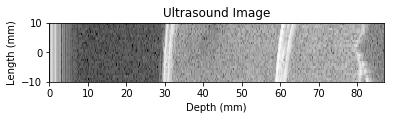

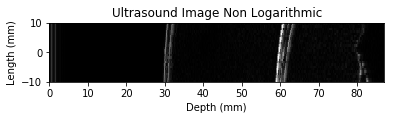

In [3]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert

#we use a simple open command for the file (basic Python)
f = open('SingleUSSignalI.dat','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Line = np.fromfile(f,count=-1,dtype=np.uint16)
L=len(Line)
LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
LineF-=np.mean(LineF)
#Now let's obtain the spectrum
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,125e6/2,125e6/L)
Y=np.fft.fft(LineF)
Pyy=abs(Y)/L

h=x*1450
ffatt=np.exp(4*4.96*h)
LineC=LineF*ffatt

#Hilbert Transform
LineE=hilbert(LineC)
LineE=abs(LineE)

#we use a simple open command for the file (basic Python)
f = open('MultipleUSSignalsI.dat','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Lines = np.fromfile(f,count=-1,dtype=np.uint16)
f.close() #close the file
#we will now populate a 2D matrix for the lines
TL=len(Lines)/L
Lines=Lines-np.mean(Lines)
LinesRF=Lines.reshape(TL,L,order='F').copy()  #columns,rows


#Compensating
h=x*1450
ffatt=np.exp(2*4.96*h)
LinesRFC=LinesRF*ffatt
LinesRFE=hilbert(LinesRFC)
LinesRFE=abs(LinesRFE)

#images need to be logarithmic so we can see all the contrast
Mx=LinesRFE.max()
Image=20*np.log10(LinesRFE/Mx)
ImageBW=LinesRFE

#the line axis
s=np.linspace(-10,10,26)
#Plotting
d=h/2*1000  #answer: why are we doing this here?
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, Image[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)  #this is because I know the image was 20mm in lenght so 26 lines=20mm or a ratio 10/13
plt.title('Ultrasound Image')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageBW[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image Non Logarithmic')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

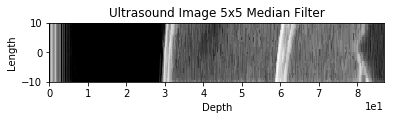

In [8]:
from scipy.signal import medfilt

#we cut anything below -60dB
cutdb=-60
inx=np.where(Image<cutdb)
Image[inx]=cutdb

#and we filter using a 5x5 median filter
ImageF=medfilt(Image,5)

#Plotting
d=h/2*1000
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image 5x5 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


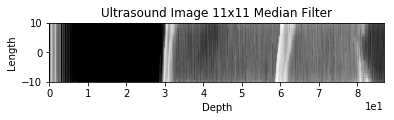

In [9]:
from scipy.signal import medfilt

#we cut anything below -60dB
cutdb=-60
inx=np.where(Image<cutdb)
Image[inx]=cutdb

#and we filter using a 11x11 median filter
ImageF=medfilt(Image,11)

#Plotting
d=h/2*1000
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image 11x11 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

From the above different types of median used to render the ultrasound images, we see that as the median filter is changed to a larger value we see different effects in the image. To enhance the quality of ultrasound image we usually use denoising filters such as media channel. As the median filter is fast it is mainly used in the ultrasound imaging machines.